<a href="https://colab.research.google.com/github/strongway/tutorial_data_science/blob/master/lecture_2022/p4-signal-detection_with_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Signal Detection Theory (SDT): Tutorial (R version)

__Zhuanghua Shi__ (shi@lmu.de)

Last update: Jan. 16, 2023

## 1. Psychometric function (PF) and Signal Detection Theory (SDT)

A psychometric function (PF) shows how human performance a certain psychophysical task (e.g., classification) at different levels of a physical stimulus (e.g., velocity, duration, brightness, etc.). Recall a typical response is binary categorical choice. When the sensory input increases continuously from undetectable (or chance level) to surely detectable range, the probability of response follows a sigmoid curve. A general psychometric function also takes into account  chance level and attentional lapses:

$$\Psi(x,\alpha, \beta, \gamma, \lambda) = \gamma + (1-\gamma -\lambda) F(x, \alpha, \beta)$$
where $\alpha$ is the threshold, $\beta$ the sensitivity, $\gamma$ the chance level, and $\lambda$ the lapse rate. $F(.)$ is a sigmoid function, such as logistic function:

$$F(x,\alpha, \beta) = \frac{1}{1 + e^{-\beta(x-\alpha)}}$$ 

## High-threshold theory

Imagine a simple two-interval force-choice (2IFC) task in which observers had to determine which of two intervals contains a target. This type of 2IFC task can be thought of as a signal detection task. Let's denote the interval containing the stimulus as $S$ (signal), and the empty interval as $N$ (noise). The figure below (Kingdom & Prins, 2016) illustrates a probability distribution of two signals. 

![High Threshold](https://github.com/strongway/tutorial_data_science/raw/master/figures/high_threshold.png)
_Figure from Kingdom and Prins (2016), Figure 4.6_

The ability of a sensory system to detect a sitmulus on any given trial depends on the amount of sensory evidence that has been accumulated. Let's assume that the average amount of accumulated evidence increases linearly as the stimulus intensity increases $x$:

$$\mu(x)=\pi + \rho x$$

Recall theh high-threshold theory assumes that the detection of a stimulus is determined by a threshold, which is the minimum amount of stimulus energy required for a person to be able to detect it. According to the theory, when the energy of a stimulus exceeds the threshold, it will be detected, and when it falls below the threshold, it will not be detected. The threshold is assumed to be high enough such that the probability that the threshold is exceeded when $x=0$ (i.e., noise) is effective zero. 
The theory also assumes that the threshold is not fixed, but can change depending on various factors such as the background noise level, the attention of observer, and the characteristics of the stimulus itself. 
With such asummption, function $F(x)$, which describes the probability that the threshold will be exceeded by a stimulus of intensity $x$, will be the cumulative normal distribution (see the inset in the above Figure).

In contrast to high-threshold theory, SDT proposes that there is no fixed internal threshold for detecting a stimulus. Instead, SDT assumes that the sensory system generate a continuous signal based on the amount of sensory evidence that has been accumulated. The decision-making process has access  to the degree of sensory evidence for both Signal and Noise. A stimulus can be thought of as a sample from the probability density function (PDF) associated with the stimulus. Even in the absence of a stimulus, varying degrees of sensory evidence can be generated, and the noise interval can be thought of as a sample from the PDF associated with the noise stimulus. Thus, the decision is based on the relative amplitude of two samples: Signal $N(\pi + \rho x), \sigma^2$, and Noise $N(\pi, \sigma^2)$. 

In an unbiased 2AFC task, a simple decision rule is that if the sample taken during the sitmulus interval is greater than the sample taken during the noise interval. This means that if the difference between the sample value from the signal interval and the sample value from the noise interval is greater than zero, the response will be considered correct. The difference in sensory evidence will be distributed as $N(\rho x, 2 \sigma^2)$. 

Reference:

Kingdom, F. A. A., & Prins, N. (2016). Psychophysics: A Practical Introduction. Academic Press. 

## 2. Calculation of d' and bias C for M-AFC

### 2.1 Yes/No 1AFC

Yes/No paradigm, known as 1AFC, is particularly prone to bias. Suppose two observers have the same internal sensitivity, but use different response criteria. Observed psychometric functions would differ a lot between two observers. The SDT can distinguish the response bias from the sensitivity with the following estimates:

$$d' = z(Hit) - z(FA)$$

$$c =-[z(Hit)+z(FA)]/2$$


### 2.2 Unbiased 2IFC

With the standard 2IFC procedure, the N and S+N stimuli are presented together in a trial as two alternatives. Remember that the decision rule is to choose the alternative in which the internal signal is biggest. If the observer adopts this rule, trials in which the _difference_ between the S+N and N samples are positive will result in a correct decision. The variance of the _difference_ is the summation of the variances of the S+N and N. The proportion correct for 2AFC is thus given by the grey area in the lower panel to the right of zero. This is:

$$ P_c = \Phi(d'/\sqrt{2})$$

and 

$$ d' = z(P_c) \sqrt2$$

![2AFC](https://github.com/strongway/tutorial_data_science/raw/master/figures/2afc.jpg)
_Graphical illustration of how d' is calculated from an unbiased 2AFC task. Figure from Kingdom and Prins (2016)_


For the __biased 2IFC__, the calculation is the same as shown in 1AFC. 


## 3. Confusion Matrix and ROC curve

1AFC or 2AFC are essential binary classification. The probabilities of outcomes from S and N define the confusion matrix. 

Response | Signal  |  Noise
-------- | -------  | -------
Yes      | Hit      | FA
No       | Miss     | CR

ROC curve plots with the horizontal axis (FA) and the vertical axis (Hit). On the same ROC curve, Hit/FA with liberal criteria locate at the right-up corner, whereas Hit/FA with conservative criteria locate at the lower-left corner. A ROC curve with high d' relative to low d' has __a larger area under the curve__. Sometimes we also use the Area under the curve (AUC) to measure the sensitity. 

Assuming Gaussian distribution, we have the folling relation between d' and AUX ($A_z$):

$$A_z = \Phi(\frac{d'}{\sqrt 2})$$

Note, sometimes we also use ROC curves and AUCs to select the best logistic regression models. 

## 4. Example: Neural decoding (Britten et al. 1992)

[Britten and collegues (1992)](https://doi.org/10.1523/JNEUROSCI.12-12-04745.1992) compared the ability of psychophysical observers and single cortical neurons to discriminate weak motion signals in a stochastic visual display. 

![RDM](https://github.com/strongway/tutorial_data_science/raw/master/figures/random_dot_motion.jpg)

They recorded money's behavioral responses as well as responses from MT neurons. The following Figure shows frequency histogram of reponses obtained from a single MT neuron at five different correlation levels. The black bars illustrate reponses for null direction motion, while the white bars represent responses for motion in the neuron's preferred direction. We can see clearly the distance between the _signal_ and the _noise_ depends on the motion coherence.  

![MT Neurons responses](https://github.com/strongway/tutorial_data_science/raw/master/figures/britten_frequencies.jpg)

Given that one sees a firing rate from that neuron in one trial, how should one decode whether the RDM was moving upward or downward? It depends on the decision criterion! The unbias decision should set the criterion in the middle. 

The below figure plots the ROC curves for the five pairs. Each ROC was generated by increasing the criterion level from 0 to 120 spikes in one-spike increments. Recall the area under the ROC is an alternative measure of the sensitivity, which is shown on the right side of the curve. 

![ROC](https://github.com/strongway/tutorial_data_science/raw/master/figures/britten_rocs.jpg)


And you can see from Figure below, the neuron's senstivity curve is very close to the behavioral responses. 

![comparison](https://github.com/strongway/tutorial_data_science/raw/master/figures/britten_comparisons.jpg)



## 5. Practice

The practice data come from the following study:

Shi, Z., Allenmark, F., Zhu, X., Elliott, M. A., & Müller, H. J. (2019). To quit or not to quit in dynamic search. Attention, Perception & Psychophysics. https://doi.org/10.3758/s13414-019-01857-7

In this study, we examined the search performance between the static and dynamic displays. One striking finding from dynamic search (Horowitz & Wolfe, 1998) is that the search slope, measured by search time per item, is similar to static search. In this study, we examined how decision crtieria that related to the quiting process influence the search performance. 

In the following practice, we estimate the target detection sensitivity and decision criteria for both the static and dynamic search displays. 

The data are availabe in the following github repository:

https://github.com/msenselab/dynamic_search


### Step 1. Load data

Let us first load the first experimental data: 

In [30]:
library(tidyverse)

#load data
dat = read.csv('https://raw.githubusercontent.com/msenselab/dynamic_search/master/data/exp1.csv', sep = ',')
dat = dat %>% mutate(resp = 2-resp) # 1 - present, 2 - absent -> 1 and 0
head(dat)

,target,setsize,dyn,resp,rt,sub,exp,correct
,<chr>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>
1,Absent,12,Static,0,2.5830068,1,1,1
2,Absent,8,Static,0,0.9359671,1,1,1
3,Present,16,Static,1,0.7947714,1,1,1
4,Present,8,Static,1,1.2418375,1,1,1
5,Absent,12,Static,0,1.7594853,1,1,1
6,Present,16,Static,1,2.1242149,1,1,1


Let's make sanity check on the data. If the response is only for categorical values. 

In [32]:
print(unique(dat$resp))
# it seems there are some missing values in the data (3, which previous was -1)
# so we filter them out
dat = dat %>% filter(resp != 3)

[1] 0 1 3


#### 1.1 Mean reaction time analysis
Before we start the signal detection analysis, we first take a look what reaction time looks like for the static and dynamic search displays. In the mean reaction time analysis, usually we first remove some outliers and then take the mean. Usually, we use the median absolute deviation (MAD) to remove outliers. That is, we remove the data points that are more than 3 MAD away from the median. We should do this for each subject.


In [73]:
# add 3 MAD and median for each subject
dat = dat %>% group_by(sub) %>% mutate(mad = mad(rt, constant = 3), median = median(rt)) %>% ungroup()
head(dat)


target,setsize,dyn,resp,rt,sub,exp,correct,mad,median
<chr>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
Absent,12,Static,0,2.5830068,1,1,1,1.976476,1.677143
Absent,8,Static,0,0.9359671,1,1,1,1.976476,1.677143
Present,16,Static,1,0.7947714,1,1,1,1.976476,1.677143
Present,8,Static,1,1.2418375,1,1,1,1.976476,1.677143
Absent,12,Static,0,1.7594853,1,1,1,1.976476,1.677143
Present,16,Static,1,2.1242149,1,1,1,1.976476,1.677143


In [74]:
# add a flag for outliers
dat = dat %>% mutate(outlier = ifelse(rt > median + mad | rt < 0.1, 1, 0))  # 0.1 is the minimum RT
head(dat)

target,setsize,dyn,resp,rt,sub,exp,correct,mad,median,outlier
<chr>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
Absent,12,Static,0,2.5830068,1,1,1,1.976476,1.677143,0
Absent,8,Static,0,0.9359671,1,1,1,1.976476,1.677143,0
Present,16,Static,1,0.7947714,1,1,1,1.976476,1.677143,0
Present,8,Static,1,1.2418375,1,1,1,1.976476,1.677143,0
Absent,12,Static,0,1.7594853,1,1,1,1.976476,1.677143,0
Present,16,Static,1,2.1242149,1,1,1,1.976476,1.677143,0


In [75]:
# now we remove outliers, average rt for each subject, target, dyn, and setsize
mrt = dat %>% filter(outlier == 0) %>% group_by(sub, target, dyn, setsize) %>% summarize(rt = mean(rt)) %>% ungroup()
head(mrt)

`summarise()` has grouped output by 'sub', 'target', 'dyn'. You can override
using the `.groups` argument.


sub,target,dyn,setsize,rt
<int>,<chr>,<chr>,<int>,<dbl>
1,Absent,Dynamic,8,2.344703
1,Absent,Dynamic,12,2.796481
1,Absent,Dynamic,16,2.699945
1,Absent,Static,8,1.622023
1,Absent,Static,12,2.053618
1,Absent,Static,16,2.266395


`summarise()` has grouped output by 'target', 'dyn'. You can override using the
`.groups` argument.


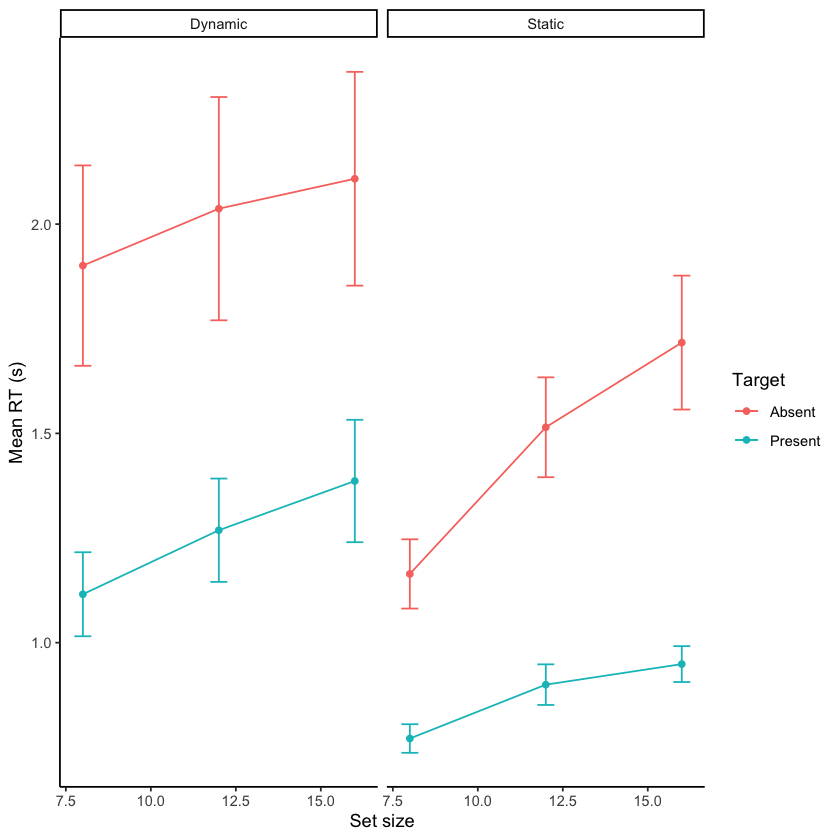

In [80]:
# we calculate the grand mean and standard error of rt for each target, dyn, and setsize, and visualize it
mmrt = mrt %>% group_by(target, dyn, setsize) %>% 
    summarize(grand_mean = mean(rt), grand_se = sd(rt)/sqrt(n())) %>% ungroup()
# visualize with ggplot
ggplot(mmrt, aes(x = setsize, y = grand_mean, color = target)) + 
    geom_point() + geom_line() + 
    geom_errorbar(aes(ymin = grand_mean - grand_se, ymax = grand_mean + grand_se), width = .5) + 
    facet_wrap( ~ dyn) + theme_classic() +
    labs(x = 'Set size', y = 'Mean RT (s)', color = 'Target')



One pecular thing is that the 'search slopes' for the dynamic displays were similar for the target-present and target-absent conditions, which is not predicted by the standard search model. For the static search, the search slope for the target-absent condition was almost twice as steep as the target-present condition. This is because on average the number of items being searched was half in the target-present condition relative to the target-absent condition.

Now let's take a look using signal detection theory, if there is any changes in the decision criteria or sensitivity.

#### 1.2 Signal detection analysis

In [39]:
# let's quickly obtain the confusion matrix
confusion = dat %>% group_by(sub, dyn, setsize, target) %>%
        summarise(accuracy = mean(resp), n = n()) 
head(confusion)

`summarise()` has grouped output by 'sub', 'dyn', 'setsize'. You can override
using the `.groups` argument.


sub,dyn,setsize,target,accuracy,n
<int>,<chr>,<int>,<chr>,<dbl>,<int>
1,Dynamic,8,Absent,0.00000000,35
1,Dynamic,8,Present,0.97142857,35
1,Dynamic,12,Absent,0.02857143,35
1,Dynamic,12,Present,1.00000000,35
1,Dynamic,16,Absent,0.08571429,35
1,Dynamic,16,Present,0.91428571,35


> question: what is the meaning of the column `accuracy`? 



### Step 2. Data transformation

We quickly realized that in some conditions, the search is relative easy and participants can performance the task without any error. This pose a potential problem when we want to calculate the z-score. For such extreme values, usually we need to make some adjustments. A common method for  adjustments is to apply a small correction ([Macmillan & Kaplan, 1985](https://www.ncbi.nlm.nih.gov/pubmed/4034817); Stanislaw & Todorov, 1999): rates of 0 were replaced by 0.5/n, and rates of 1 by 1–0.5/n, where n is the number of trials, respectively.


In [40]:
# replace 0 with 0.5/n and 1 with 1-0.5/n in the accuracy column
confusion = confusion %>% mutate(accuracy = ifelse(accuracy == 0, 0.5/n, accuracy)) %>% 
        mutate(accuracy = ifelse(accuracy == 1, 1-0.5/n, accuracy))
head(confusion)

sub,dyn,setsize,target,accuracy,n
<int>,<chr>,<int>,<chr>,<dbl>,<int>
1,Dynamic,8,Absent,0.01428571,35
1,Dynamic,8,Present,0.97142857,35
1,Dynamic,12,Absent,0.02857143,35
1,Dynamic,12,Present,0.98571429,35
1,Dynamic,16,Absent,0.08571429,35
1,Dynamic,16,Present,0.91428571,35


After adjust the data, we need to transform the 'long' format table to 'wide' format table as confusion matrix. 
Note, in this example, the signal is 'Target present', and the noise is 'Target Absent'. So we need the column 'target' for transformation. Transformation can be done with `pivot_wider()` function. 

In [41]:
# before we can use the pivot_wider function, we need to remove the n column
cWide = confusion %>% select(-n) %>% pivot_wider(names_from = target, values_from = accuracy)
head(cWide)

sub,dyn,setsize,Absent,Present
<int>,<chr>,<int>,<dbl>,<dbl>
1,Dynamic,8,0.01428571,0.9714286
1,Dynamic,12,0.02857143,0.9857143
1,Dynamic,16,0.08571429,0.9142857
1,Static,8,0.01428571,0.9857143
1,Static,12,0.01428571,0.9714286
1,Static,16,0.01428571,0.9714286


Now we have the confusion matrix for each participant. The columns `Present` and `Absent` are the rate of hits and false alarm, respectively. As we know, the miss rate is 1 - hit rate, and the correct rejection rate is 1 - false alarm rate.


In [46]:
# lets rename the columns Absent and Present to FA and Hit
colnames(cWide) = c('sub', 'dyn', 'setsize', 'FA', 'Hit')
head(cWide)

sub,dyn,setsize,FA,Hit
<int>,<chr>,<int>,<dbl>,<dbl>
1,Dynamic,8,0.01428571,0.9714286
1,Dynamic,12,0.02857143,0.9857143
1,Dynamic,16,0.08571429,0.9142857
1,Static,8,0.01428571,0.9857143
1,Static,12,0.01428571,0.9714286
1,Static,16,0.01428571,0.9714286


### Step 3. Calculation of d' and C

$$d' = z(Hit) - z(FA)$$
$$C = - (z(Hit)+ z(FA))/2$$

The z-score in R can be calculated with `qnorm()` function. We calculate the d' and C for each participant and add them to the confusion matrix as new columns using `mutate()` function.

In [47]:
# now we calculate d' and C
cWide = cWide %>% mutate(dprime = qnorm(Hit) - qnorm(FA), C = -0.5*(qnorm(Hit) + qnorm(FA)))
head(cWide)

sub,dyn,setsize,FA,Hit,dprime,C
<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,Dynamic,8,0.01428571,0.9714286,4.091566,1.435666e-01
1,Dynamic,12,0.02857143,0.9857143,4.091566,-1.435666e-01
1,Dynamic,16,0.08571429,0.9142857,2.735256,0.000000e+00
1,Static,8,0.01428571,0.9857143,4.378700,-6.661338e-16
1,Static,12,0.01428571,0.9714286,4.091566,1.435666e-01
1,Static,16,0.01428571,0.9714286,4.091566,1.435666e-01


### Step 4. Visualization

Let's first check the sensitivity. As you can see from the figure below, the dynamic display had much worse detection sensitivity as compared to the static display. The reduction of the sensitivity as a function of the display set size, however, remained the same for two display types. 




In [50]:
# let's average d' and C across subjects
mSDT = cWide %>% group_by(dyn, setsize) %>% 
    summarise(n = n(), md = mean(dprime), dse = sd(dprime)/sqrt(n), 
                    mc = mean(C), Cse = sd(C)/sqrt(n))
mSDT

`summarise()` has grouped output by 'dyn'. You can override using the `.groups`
argument.


dyn,setsize,n,md,dse,mc,Cse
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Dynamic,8,11,3.346979,0.2504379,-0.19270432,0.08699211
Dynamic,12,11,3.077152,0.2528495,-0.16451360,0.11438768
Dynamic,16,11,2.825317,0.3189047,-0.07609755,0.12407250
Static,8,11,4.077042,0.1193734,0.09862271,0.03928546
Static,12,11,4.006727,0.1337310,0.10441671,0.08270305
Static,16,11,3.766585,0.1695538,0.09397291,0.05021553


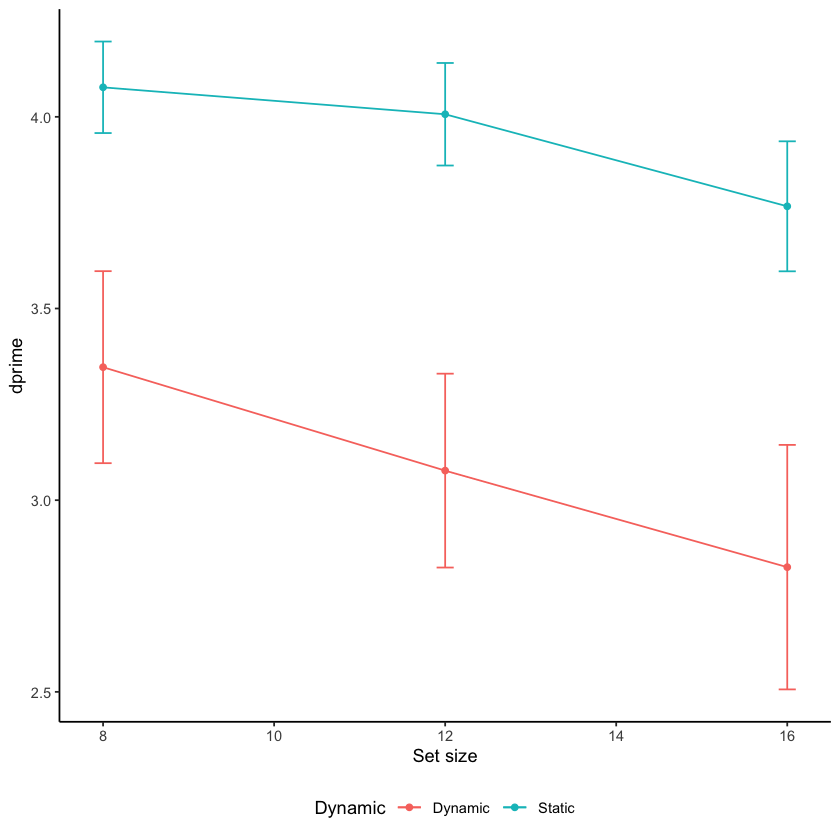

In [55]:
# visualize the dprime
ggplot(mSDT, aes(x = setsize, y = md, color = dyn, group = dyn)) + 
    geom_point() + geom_line() +  geom_errorbar(aes(ymin = md-dse, ymax = md+dse), width = 0.2) + 
    theme_classic() + theme(legend.position = 'bottom') + 
    labs(x = 'Set size', y = 'dprime', color = 'Dynamic')


Now let's check the decision criteria C. 

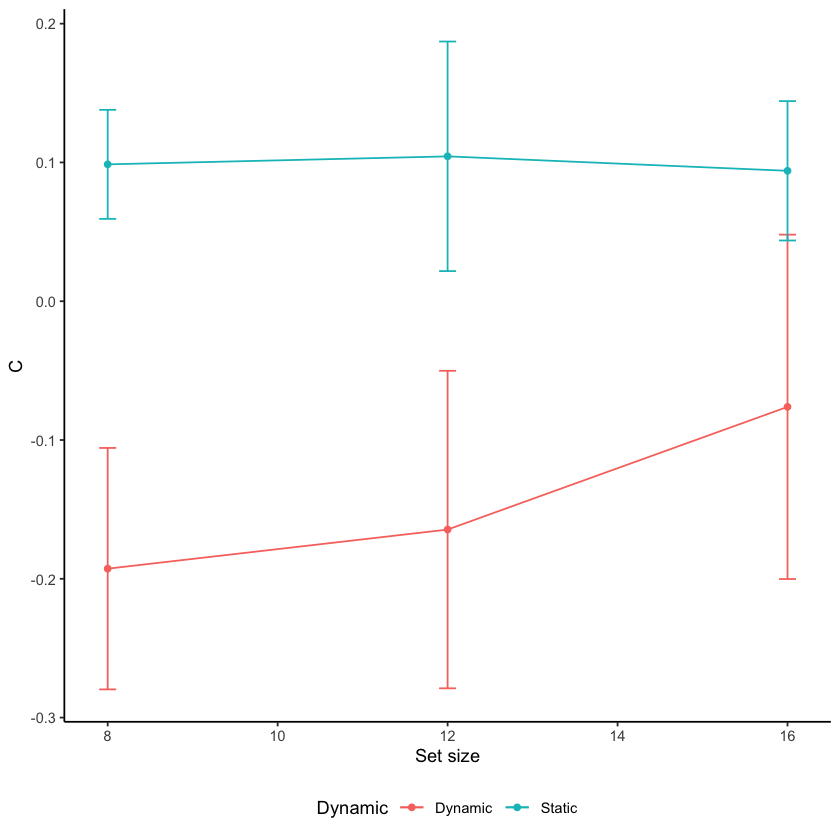

In [56]:
# visualize the C
ggplot(mSDT, aes(x = setsize, y = mc, color = dyn, group = dyn)) + 
    geom_point() + geom_line() +  geom_errorbar(aes(ymin = mc-Cse, ymax = mc+Cse), width = 0.2) + 
    theme_classic() + theme(legend.position = 'bottom') + 
    labs(x = 'Set size', y = 'C', color = 'Dynamic')

As you can see from the above figure, participants tended to make more liberal responses in  dynamic search relative to static search. That is, they were more likely make 'target present' responses than 'target absent' responses. 

However, this was changed when we applied reward manipulation in Exp. 2. 

### Your practical task

Your practical task is to do similar analysis for Experiment 2. 
To facilitate your analysis, the data have been loaded using the following code: 

In [62]:
#load data
exp2 = read.csv('https://raw.githubusercontent.com/msenselab/dynamic_search/master/data/exp2.csv', sep = ',') 
exp2 = exp2 %>% filter(resp != -1) %>% # remove missing values %>%
        mutate(resp = 2-resp) # 1 - present, 2 - absent -> 1 and 0
head(exp2)

,target,setsize,dyn,resp,rt,sub,reward,correct
,<chr>,<int>,<chr>,<dbl>,<dbl>,<int>,<chr>,<int>
1,Absent,12,Static,0,2.0583111,1,Absent,1
2,Present,8,Static,1,0.6495192,1,Absent,1
3,Present,16,Static,1,0.5995575,1,Absent,1
4,Present,12,Static,1,0.4896663,1,Absent,1
5,Absent,12,Static,0,1.8984851,1,Absent,1
6,Absent,8,Static,0,0.8893312,1,Absent,1


__Your task:__

In [63]:
# code here (similar to above)